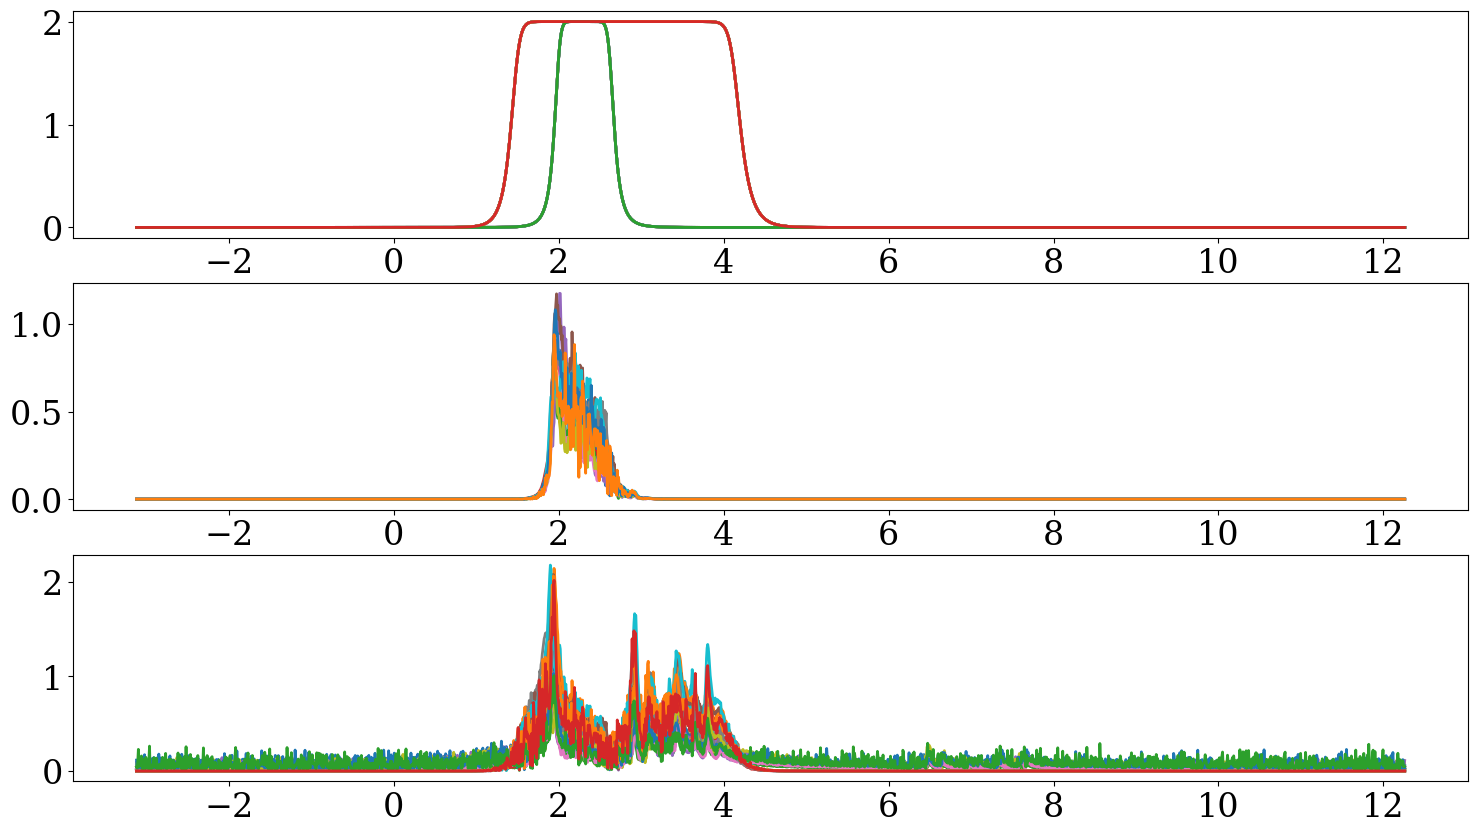

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from myfunctions_tf import BPF_ppm
path = "/home/stud/casperc/bhome/Project3_DL_sigpros/generated_data/2025_03_21-21_03_30-standard_amplitude_npz/"
ppm = np.linspace(-3.121, 12.258, 2048)
plt.figure()
TE_lws = os.listdir(path)
for TE_lw in TE_lws:
    for file in os.listdir(path + TE_lw)[:1]:
        if file.endswith(".npz"):
            data = np.load(path + TE_lw + "/" + file)
            plt.subplot(311)
            plt.plot(ppm, data["filter_impulse_response_GABA"].__abs__(), label="Impulse response gaba")
            plt.plot(ppm, data["filter_impulse_response_full"].__abs__(), label="Impulse response full")
            plt.subplot(312)
            plt.plot(ppm, data["fft_filtered_GABA"].__abs__(), label="GABA")
            
            plt.subplot(313)
            plt.plot(ppm, data["augmented"].__abs__(), label="Full")
            plt.plot(ppm, data["fft_filtered_full"].__abs__(), label="Full")
""" ppm = np.linspace(-3.121, 12.258, 2048)
path = "/home/stud/casperc/bhome/Project3_DL_sigpros/generated_data/train/TE20_lw03_0001_data.npz"
# 1.6 - 4.2 ppm
passband =  np.array([2.1, 2.7]) # ppm
margin = 0.75
ftype = "butter"
pass_band_gain = 2
data = np.load(path)

filtered_signal, fft_filtered_signal, complex_response = BPF_ppm(data["augmented"], np.array((ppm[0], ppm[-1])), margin=margin, ppm_pass=passband, ftype=ftype, gain_passband=pass_band_gain)

plt.subplot(311)
plt.plot(ppm, data["filter_impulse_response"].__abs__(), label="Impulse response")
plt.plot(ppm, complex_response.__abs__(), label="Complex response")
plt.axvline(x=2.2, color='red', linestyle='--', label='Passband Edge 1.6 ppm')
plt.axvline(x=2.7, color='blue', linestyle='--', label='Passband Edge 4.1 ppm')
plt.axvline(x=4.7, color='blue', linestyle='--', label='Passband Edge 4.1 ppm')
plt.legend()
plt.subplot(312)
#plt.plot(ppm, data["fft_filtered_signal"].__abs__())
plt.plot(ppm, fft_filtered_signal.__abs__())
plt.legend()
plt.subplot(313)
plt.plot(ppm, data["NAA"].real, label="Augmented")    
plt.plot(ppm, data["GABA"].real, label="GABA")
plt.plot(ppm, data["Glu"].real, label="Glu")
plt.plot(ppm, data["Gln"].real, label="Gln")
plt.plot(ppm, data["GABA"].real + data["Glu"].real + data["Gln"].real, label="Sum")

plt.legend() """
                
#.gca().invert_xaxis()
plt.show()

In [ ]:
path = "/home/stud/casperc/bhome/Project3_DL_sigpros/generated_data/train/TE20_lw03_0001_data.npz"
data = np.load(path)
for key in data.keys():
    print(key)
    

    

original
augmented
baseline
metadata
augmented_ifft
a
b
original_ifft
iir_order
filter_impulse_response
filtered_signal
fft_filtered_signal
GSH
GPC
Glc
NAAG
NAA
Tau
PCho
Gly
mI
Ala
GABA
Lac
PCr
Glu
Cr
Gln
GSH_ifft
GPC_ifft
Glc_ifft
NAAG_ifft
NAA_ifft
Tau_ifft
PCho_ifft
Gly_ifft
mI_ifft
Ala_ifft
GABA_ifft
Lac_ifft
PCr_ifft
Glu_ifft
Cr_ifft
Gln_ifft


In [1]:
random_dict = {"a": 1, "b": 2, "c": 3}
print(random_dict.keys())

dict_keys(['a', 'b', 'c'])


In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from myfunctions_tf import BPF_ppm, load_from_directory, multi_channel_cnn, ComplexFilterOptimizer



2025-03-25 10:29:42.194890: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-25 10:29:42.195018: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-25 10:29:42.197037: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 10:29:42.374347: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Test gpu access
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Set visible gpu
os.environ["CUDA_VISIBLE_DEVICES"] = "4"
available_devices = tf.config.list_physical_devices('GPU')
print(f"available devices: {available_devices}")
tf.config.set_visible_devices(available_devices[0], 'GPU')
print(f"visible devices: {tf.config.get_visible_devices()}")

FID_gaba_weights_path = "/home/stud/casperc/bhome/Project3_DL_sigpros/tf_experiments/2025_03_24-10_54_09_['augmented_ifft', 'filtered_GABA']_['original', 'baseline', 'NAA', 'NAAG', 'Cr', 'PCr', 'PCho', 'GPC', 'GABA', 'Gln', 'Glu']_ResNet1D_RMSprop_Huber/checkpoint.hdf5"
FID_full_filt_weights_path = "/home/stud/casperc/bhome/Project3_DL_sigpros/tf_experiments/2025_03_24-10_52_49_['augmented_ifft', 'filtered_full']_['original', 'baseline', 'NAA', 'NAAG', 'Cr', 'PCr', 'PCho', 'GPC', 'GABA', 'Gln', 'Glu']_ResNet1D_RMSprop_Huber/checkpoint.hdf5"
FID_ab_gaba_weights_path = "/home/stud/casperc/bhome/Project3_DL_sigpros/tf_experiments/2025_03_23-21_40_40_['augmented_ifft', 'a', 'b', 'filtered_GABA']_['original', 'baseline', 'NAA', 'NAAG', 'Cr', 'PCr', 'PCho', 'GPC', 'GABA', 'Gln', 'Glu']_ResNet1D_RMSprop_Huber/checkpoint.hdf5"
FID_ab_full_filt_weights_path = "/home/stud/casperc/bhome/Project3_DL_sigpros/tf_experiments/2025_03_23-21_40_40_['augmented_ifft', 'a', 'b', 'filtered_full']_['original', 'baseline', 'NAA', 'NAAG', 'Cr', 'PCr', 'PCho', 'GPC', 'GABA', 'Gln', 'Glu']_ResNet1D_RMSprop_Huber/checkpoint.hdf5"
FID_ab_weights_path = "/home/stud/casperc/bhome/Project3_DL_sigpros/tf_experiments/2025_03_23-21_37_44_['augmented_ifft', 'a', 'b']_['original', 'baseline', 'NAA', 'NAAG', 'Cr', 'PCr', 'PCho', 'GPC', 'GABA', 'Gln', 'Glu']_ResNet1D_RMSprop_Huber/checkpoint.hdf5"
FID_weights_path = "/home/stud/casperc/bhome/Project3_DL_sigpros/tf_experiments/2025_03_23-21_37_38_['augmented_ifft']_['original', 'baseline', 'NAA', 'NAAG', 'Cr', 'PCr', 'PCho', 'GPC', 'GABA', 'Gln', 'Glu']_ResNet1D_RMSprop_Huber/checkpoint.hdf5"




Num GPUs Available:  8
available devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:4', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:5', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:6', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:7', device_type='GPU')]
visible devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
tf.Tensor(3, shape=(), dtype=int32)
